In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [3]:
psi = 1e-4
omega_a = 21
omega_b = -3
omega_c = -8
R_a = 20
R_b =  1.2e4
R_c =  5e4
Galactic_thickness = 1000
a = np.array([R_a, R_b, R_c])

In [4]:
def density_func(R):
    if isinstance(R, float) or isinstance(R, int):
        return psi * (np.exp(omega_a - R/R_a) + np.exp(omega_b - R/R_b) + np.exp(omega_c - R/R_c))
    return psi *( np.exp([omega_a]*len(R) - R/R_a ) +np.exp([omega_b]*len(R) - R/R_b ) + np.exp([omega_c]*len(R) - R/R_c ) )

def rounded(x, n=4):
    if x == 0:
        return 0
    else:
        return round(x, n - int(np.floor(np.log10(abs(x)))) - 1)

def integrand(r):
    return Galactic_thickness * np.pi * r**2 * density_func(r)

In [5]:
r = np.linspace(0,1.3e5, 10000)
density = density_func(r)

In [6]:
R_max = 1.3e5
num_stars, error = integrate.quad(integrand, 0, R_max)
print("Num_stars:", num_stars,"\nError:", error)

Num_stars: 6695759262896.897 
Error: 64076.585414886475


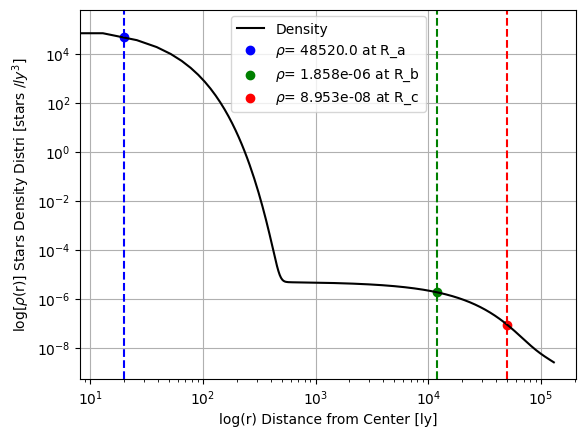

In [8]:
plt.plot(r, density, color='black', label="Density")
b =  density_func(a)
colors = ['blue', 'green', 'red']
labels = [fr'$\rho$= {rounded(b[0])} at R_a', fr'$\rho$= {rounded(b[1])} at R_b', fr'$\rho$= {rounded(b[2])} at R_c']
for i in range(len(a)):
    plt.scatter(a[i], b[i], color=colors[i], label=labels[i])
plt.axvline(x = 20, linestyle= "--", color = 'blue') #, label = '20 ly line'
plt.axvline(x = 1.2e4, linestyle= "--", color = 'green') #, label = '1.2e4 ly line'
plt.axvline(x = 5e4, linestyle= "--", color = 'red') #, label = '5e4 ly line'
plt.xlabel("log(r) Distance from Center [ly]")
plt.ylabel(r"log[$\rho$(r)] Stars Density Distri [stars /$ly^3$]")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()